# Prepare Source Data

This notebook fetches and prepares data from three sources:
1. **Atropia Data**: Fictional country news samples for context
2. **World Bank Demographics**: Synthetic demographic profiles
3. **Social Media References**: Visual descriptions for image generation

**Workshop**: AI/ML Pipeline - Synthetic Data Generation  
**Date**: January 23, 2026  
**Platform**: CyVerse Jupyter Lab PyTorch GPU

## Setup

Import required modules and configure paths.

In [2]:
import sys
from pathlib import Path
import json
import pandas as pd

# Add parent directory to path to import src modules
parent_dir = Path.cwd().parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

from src import config, data_loader

print("Modules imported successfully")

Modules imported successfully


c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\src\gemini_client.py:12: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


## Load Configuration

Load configuration settings for data fetching.

In [ ]:
# Load configuration
cfg = config.load_config()

# Get source data configuration
source_config = cfg.source_data

print("Configuration loaded:")
print(f"  Atropia samples: {source_config['atropia']['num_samples']}")
print(f"  World Bank profiles: {source_config['worldbank']['num_profiles']}")
print(f"\n Configuration ready")

2026-01-21 18:06:23,136 - src.config - INFO - Logging configured successfully


Configuration loaded:
  Atropia samples: 100
  World Bank profiles: 50

✓ Configuration ready


## 1. Fetch Atropia Data

Atropia is a fictional country used in U.S. military training scenarios. We'll fetch (or generate) news samples about political events, protests, and civil society activities.

In [4]:
# Initialize Atropia data loader
data_dir = cfg.get_data_path('raw')
atropia_loader = data_loader.AtropiaDataLoader(
    data_dir=data_dir,
    num_samples=source_config['atropia']['num_samples']
)

# Fetch data
print("Fetching Atropia data")
atropia_data = atropia_loader.fetch_data()

print(f"\n Loaded {len(atropia_data)} Atropia samples")
print(f"  Saved to: {data_dir / 'atropia_samples.json'}")

2026-01-21 18:08:48,952 - src.data_loader - INFO - Fetching Atropia data...


Fetching Atropia data


2026-01-21 18:08:49,880 - src.data_loader - WARNING - Could not fetch from web. Generating synthetic Atropia samples.
2026-01-21 18:08:49,893 - src.data_loader - INFO - Saved Atropia data to c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\atropia_samples.json
2026-01-21 18:08:49,895 - src.data_loader - INFO - Loaded 100 Atropia samples



 Loaded 100 Atropia samples
  Saved to: c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\atropia_samples.json


### Preview Atropia Data

Let's look at a few samples to understand the data structure.

In [5]:
# Display first 3 samples
print("Sample Atropia News:")
print("=" * 80)

for i, sample in enumerate(atropia_data[:3], 1):
    print(f"\n{i}. {sample['title']}")
    print(f"   Theme: {sample['theme']}")
    print(f"   Location: {sample['location']}")
    print(f"   Excerpt: {sample['excerpt']}")
    print("-" * 80)

Sample Atropia News:

1. Atropia News: Protests
   Theme: protests
   Location: Market District
   Excerpt: Citizens gather in Market District to protest government transparency. Demonstrators call for government accountability.
--------------------------------------------------------------------------------

2. Atropia News: Political Unrest
   Theme: political_unrest
   Location: University District
   Excerpt: Workers union leads march through University District protesting education funding.
--------------------------------------------------------------------------------

3. Atropia News: Economic Conditions
   Theme: economic_conditions
   Location: Government Quarter
   Excerpt: Tensions rise in Government Quarter as protesters clash with authorities over education funding.
--------------------------------------------------------------------------------


### Analyze Atropia Themes

Let's see the distribution of themes in our dataset.

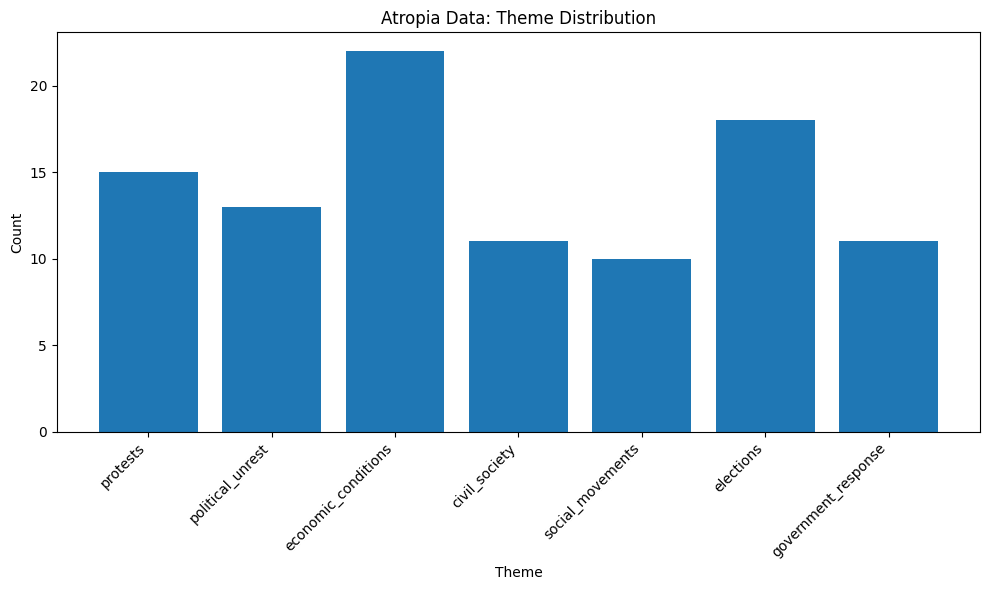

Theme distribution:
  economic_conditions: 22
  elections: 18
  protests: 15
  political_unrest: 13
  civil_society: 11
  government_response: 11
  social_movements: 10


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Count themes
themes = [sample['theme'] for sample in atropia_data]
theme_counts = Counter(themes)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(theme_counts.keys(), theme_counts.values())
plt.xlabel('Theme')
plt.ylabel('Count')
plt.title('Atropia Data: Theme Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Theme distribution:")
for theme, count in theme_counts.most_common():
    print(f"  {theme}: {count}")

## 2. Fetch World Bank Demographics

Generate synthetic demographic profiles based on World Bank data patterns.

In [ ]:
# Initialize World Bank data loader
worldbank_loader = data_loader.WorldBankDataLoader(
    data_dir=data_dir,
    num_profiles=source_config['worldbank']['num_profiles']
)

# Fetch data
print("Fetching World Bank demographics...")
worldbank_data = worldbank_loader.fetch_data()

print(f"\nLoaded {len(worldbank_data)} demographic profiles")
print(f"  Saved to: {data_dir / 'worldbank_demographics.csv'}")

2026-01-21 18:09:38,449 - src.data_loader - INFO - Fetching World Bank demographics...
2026-01-21 18:09:38,488 - src.data_loader - INFO - Saved 50 demographic profiles to c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\worldbank_demographics.csv


Fetching World Bank demographics...

✓ Loaded 50 demographic profiles
  Saved to: c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\worldbank_demographics.csv


### Preview World Bank Demographics

In [9]:
# Display first few profiles
print("Sample Demographic Profiles:")
print(worldbank_data.head(10))

print("\nDataset Info:")
print(worldbank_data.info())

Sample Demographic Profiles:
  profile_id age_group     occupation education_level   setting  \
0     wb_001     25-34     technology    professional  suburban   
1     wb_002       65+    agriculture       secondary     urban   
2     wb_003     45-54     government   undergraduate     urban   
3     wb_004     45-54    agriculture         primary     urban   
4     wb_005     45-54     technology         primary  suburban   
5     wb_006       65+     technology         primary  suburban   
6     wb_007     35-44  manufacturing   undergraduate     urban   
7     wb_008     45-54     healthcare   undergraduate     rural   
8     wb_009     45-54     healthcare        graduate     rural   
9     wb_010     25-34     unemployed    professional  suburban   

   household_size  
0               3  
1               2  
2               2  
3               1  
4               6  
5               6  
6               6  
7               2  
8               6  
9               1  

Dataset Info

### Analyze Demographics Distribution

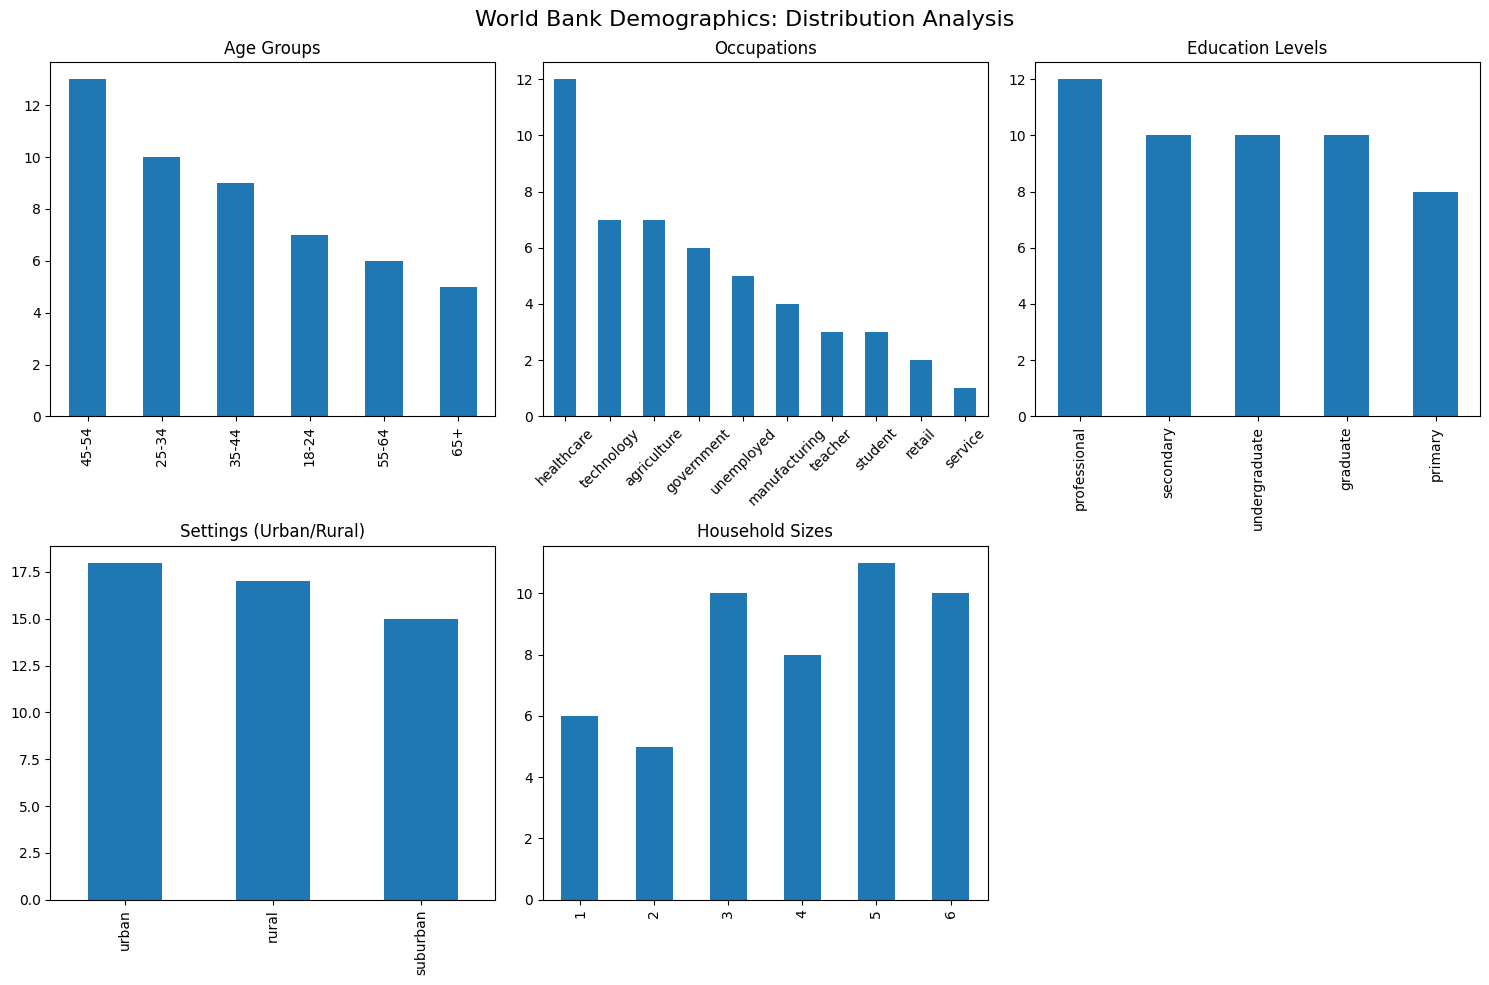

In [10]:
# Create subplots for different demographic categories
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('World Bank Demographics: Distribution Analysis', fontsize=16)

# Age groups
worldbank_data['age_group'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Age Groups')
axes[0, 0].set_xlabel('')

# Occupations
worldbank_data['occupation'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Occupations')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# Education levels
worldbank_data['education_level'].value_counts().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Education Levels')
axes[0, 2].set_xlabel('')

# Settings
worldbank_data['setting'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Settings (Urban/Rural)')
axes[1, 0].set_xlabel('')

# Household sizes
worldbank_data['household_size'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Household Sizes')
axes[1, 1].set_xlabel('')

# Hide last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 3. Load Social Media References

Load visual descriptions or reference images for prompt construction.

In [11]:
# Initialize social media data loader
socialmedia_loader = data_loader.SocialMediaDataLoader(data_dir=data_dir)

# Load descriptions
print("Loading social media visual references")
socialmedia_data = socialmedia_loader.load_descriptions()

print(f"\nLoaded {len(socialmedia_data)} visual references")

2026-01-21 18:11:23,865 - src.data_loader - WARNING - Descriptions file not found: c:\Users\lwert\OneDrive - University of Arizona\Documents\Fellowships\Jetstream\AI-ML_PipelineWorkshop\DataCollection\data\raw\visual_descriptions.json
2026-01-21 18:11:23,866 - src.data_loader - INFO - Generating placeholder visual descriptions


Loading social media visual references

Loaded 10 visual references


### Preview Visual References

In [ ]:
# Display first few references
print("Sample Visual References:")
print("=" * 80)

for i, ref in enumerate(socialmedia_data[:5], 1):
    print(f"\n{i}. {ref['description']}")
    print(f"   Setting: {ref.get('setting', 'N/A')}")
    print(f"   Activity: {ref.get('activity_level', 'N/A')}")
    print("-" * 80)

## 4. Combine Data Sources

Demonstrate how data from all three sources can be combined for prompt generation.

In [ ]:
# Initialize data combiner
combined = data_loader.DataCombiner(
    atropia_loader=atropia_loader,
    worldbank_loader=worldbank_loader,
    socialmedia_loader=socialmedia_loader
)

# Generate 5 sample combinations
print("Generating sample data combinations...")
combined_samples = combined.sample_combined(n=5)

print(f"\n✓ Generated {len(combined_samples)} combined samples")

### Preview Combined Data

In [ ]:
# Display combined samples
print("Sample Combined Data:")
print("=" * 80)

for i, sample in enumerate(combined_samples, 1):
    print(f"\nCombination {i}:")
    print(f"  Atropia Theme: {sample['atropia']['theme']}")
    print(f"  Atropia Location: {sample['atropia']['location']}")
    print(f"  Demographics: Age {sample['demographics']['age_group']}, {sample['demographics']['occupation']}")
    print(f"  Visual Reference: {sample['visual_reference']['description']}")
    print("-" * 80)

## Summary

All source data has been prepared and is ready for image generation!

In [ ]:
print("\n" + "=" * 80)
print("SOURCE DATA PREPARATION COMPLETE")
print("=" * 80)
print(f"\n✓ Atropia samples: {len(atropia_data)}")
print(f"✓ World Bank profiles: {len(worldbank_data)}")
print(f"✓ Visual references: {len(socialmedia_data)}")
print(f"\nAll data saved to: {data_dir}")
print("\nNext step: Run notebook 03_generate_images.ipynb to create synthetic images")